#Identifying Fraund from Enron Email

<em><small>Uirá Caiado. June 21, 2015</small></em>

----------

###Abstract

I explore the public Enron financial and email dataset to identify Enron Employees who may have committed fraud. My goal is to build a machine learning algorithm to solve this chalange.

###Introduction

According to <a href="https://en.wikipedia.org/wiki/Enron">Wikipedia</a>, Enron was an energy, commodities, and services company that had employed approximately 20,000 staff. It was one of the largest companies in the United States, with claimed revenues of nearly $111 billion during 2000.

Also, it was one of the largest business scandals in American history, falling into bankruptcy in 2001 after was revealed widespread corporate fraud. As pointed out in the Udacity <a href="https://docs.google.com/document/d/10GYepNkDj-Kc_Sf6to3WX_q_SdymPOBJf3H-pq7a62g/pub">project description</a>, in the resulting Federal investigation, there was a significant amount of typically confidential information entered into the public record, including emails and financial data for top executives.

Given that there is a list of people who were somewhat involved in the scandal, here called person of interest (POI), I will try to develop a machine learning algorithm to identify those people with an acceptable accuracy.

###Understanding the Dataset

####Summarizing the dataset

The data set is relatively small, and the number of identified POIs is even smaller. There are 146 different data points, or people, in this collection, but just 18 were classified as POIs. Each data point has 21 features, although more than half of these features didn't display any information for 40% or more of all dataset, as shown below.

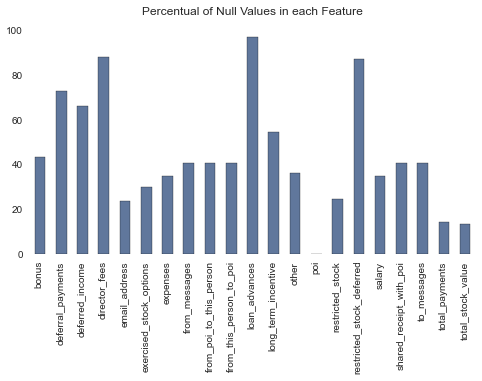

In [85]:
stats.NanAtFetaures()

Despite all the missing data, it still would be complex to analyze all possible correlations between these features. Here is where machine learning (ML) comes to play. Quonting this [book](http://www.amazon.com/Building-Machine-Learning-Systems-Python/dp/1782161406), ML teaches machines how to carry out tasks by themselves, providing them with a couple of examples.

####Outlier Investigation

The point here is those examples. They should be VALID examples if I want to build a good estimator or classifier. Then, first of all, I need to look for outliers. Let's check that looking some of the features.

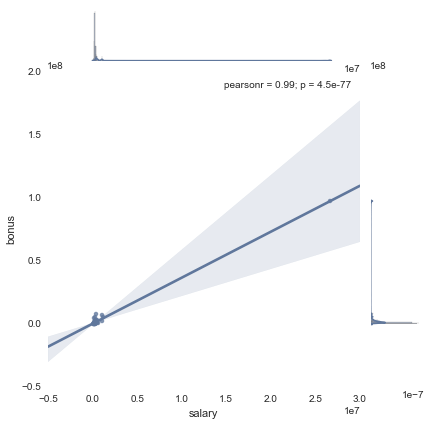

In [92]:
stats.scatter("salary", "bonus")

Here can be easily visualized that there is some data far away from the most of the data points. First, I am going to check who is in the top 10% of the "salary" feature.


In [188]:
stats.getLastDecile('salary')

,salary,poi
TOTAL,26704229,False


Hm... a summation. I will exclude this data point and run the scatter plot again 

In [189]:
df = stats.getData()
df.drop("TOTAL", inplace= True)
stats.setData(df)

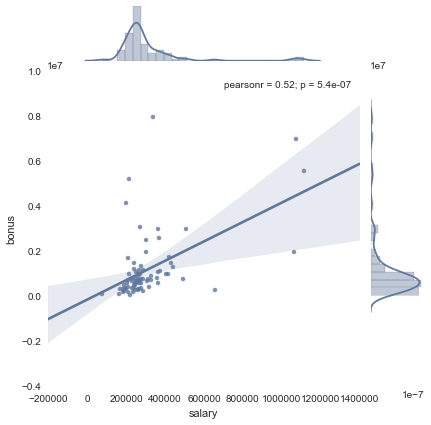

In [190]:
stats.scatter("salary", "bonus")

Much better. Looking at the last decile of each feature, I can see that nether salary or bonus seens hold real outliers.

In [194]:
stats.getLastDecile('salary')

,salary,poi
SKILLING JEFFREY K,1111258,True


In [192]:
stats.getLastDecile('bonus')

,bonus,poi
LAVORATO JOHN J,8000000,False


It is a huge bonus for someone who was not a POI. Looking at the other features for this data point,  it seems that I should keep this information.

In [203]:
df.loc['LAVORATO JOHN J']

bonus                                        8000000
deferral_payments                                NaN
deferred_income                                  NaN
director_fees                                    NaN
email_address                john.lavorato@enron.com
exercised_stock_options                      4158995
expenses                                       49537
from_messages                                   2585
from_poi_to_this_person                          528
from_this_person_to_poi                          411
loan_advances                                    NaN
long_term_incentive                          2035380
other                                           1552
poi                                            False
restricted_stock                             1008149
restricted_stock_deferred                        NaN
salary                                        339288
shared_receipt_with_poi                         3962
to_messages                                   

In [208]:
stats.getLastDecile('to_messages')

,to_messages,poi
SHAPIRO RICHARD S,15149,False


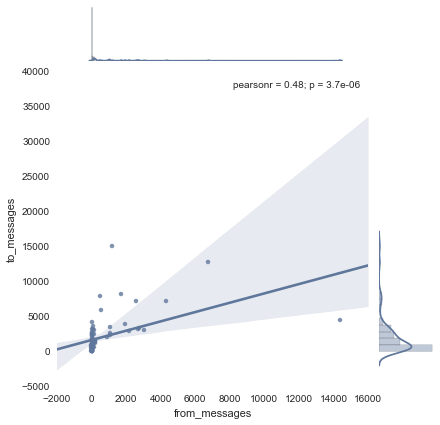

In [210]:
stats.scatter("from_messages", "to_messages")

In [212]:
stats.getLastDecile('from_messages')


,from_messages,poi
KAMINSKI WINCENTY J,14368,False


In [213]:
df = stats.getData()
df.drop("KAMINSKI WINCENTY J", inplace= True)
stats.setData(df)

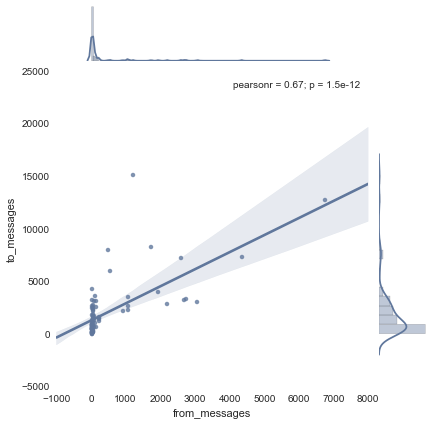

In [214]:
stats.scatter("from_messages", "to_messages")

###Feature Selection and Engineering

1. What features did you end up using in your POI identifier, and what selection process did you use to pick them?  Did you have to do any scaling?  Why or why not?  As part of the assignment, you should attempt to engineer your own feature that doesn’t come ready-made in the dataset--explain what feature you tried to make, and the rationale behind it.  (You do not necessarily have to use it in the final analysis, only engineer and test it.)  If you used an algorithm like a decision tree, please also give the feature importances of the features that you use.  [relevant rubric items: “create new features”, “properly scale features”, “intelligently select feature”]

###Pick and Tune an Algorithm

1. What algorithm did you end up using?  What other one(s) did you try? [relevant rubric item: “pick an algorithm”]
2. What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm?  (Some algorithms don’t have parameters that you need to tune--if this is the case for the one you picked, identify and briefly explain how you would have done it if you used, say, a decision tree classifier). [relevant rubric item: “tune the algorithm”]

###Evaluation

1. What is validation, and what’s a classic mistake you can make if you do it wrong?  How did you validate your analysis?  [relevant rubric item: “validation strategy”]
2. Give at least 2 evaluation metrics, and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance. [relevant rubric item: “usage of evaluation metrics”]

###Reflection

<em>Custom CSS</em>

In [56]:
#loading style sheet
from IPython.core.display import HTML
HTML( open('ipython_style.css').read() )

In [185]:
#changing matplotlib defaults
import eda; reload(eda);
stats = eda.Eda()
%matplotlib inline
import seaborn as sns
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})